# What is Sherpa?

CIAO provides the `sherpa` "tool", but what is it?

It is a "wrapper" around `ipython` that

- automatically starts up `matplotlib`: `ipython --matplotlib`

- prints out a header welcoming you to the glories of Sherpa

- automatically loads useful modules:

    import numpy as np
    from matplotlib import pyplot as plt
    from pycrates import *  # This is the CIAO I/O module
    from sherpa.astro.ui import *

- sets up optional IPython things, such as tweaking the prompt and adding brackets ("`str 42` -> `str(42)`)

- there's a few CIAO-specific additions, such as the `ahelp` function, and we hide much of the traceback as we don't think it useful for most users

If you want to you can tweak the Sherpa settings in the directory

    ~/.ipython-ciao/profile_sherpa/
    ~/.ipython-ciao/profile_sherpa/startup/
    
You do **not** need to use the `sherpa` "tool" - you can just use `python`, `ipython`, of even Jupyter notebooks!

I am not going to try running sherpa from within this notebook as it'll essentially hang the process!

```
% sherpa
sherpa
-----------------------------------------------------
Welcome to Sherpa: CXC's Modeling and Fitting Package
-----------------------------------------------------
Sherpa 4.13.0

Python 3.8.2 (default, Mar 25 2020, 17:03:02)
Type 'copyright', 'credits' or 'license' for more information
IPython 7.21.0 -- An enhanced Interactive Python. Type '?' for help.

IPython profile: sherpa
Using matplotlib backend: Qt5Agg

sherpa In [1]:
```


# Running Sherpa from the notebook

In [1]:
from sherpa.astro.ui import *

In [2]:
load_arrays(1, [1, 2, 5, 10], [9, -2, 12, 14])

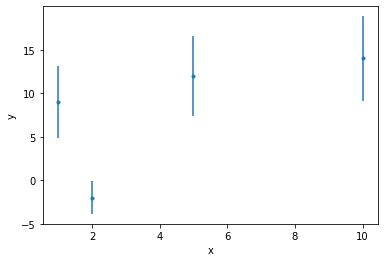

In [3]:
plot_data()

So far this matches the "sherpa" tool. We do have some extra support for Jupyter notebooks, taking advantage of its "rich interface" support to get nicer output:

In [4]:
get_data()  # rich putput

<Data1D data set instance ''>

In [5]:
set_source(polynom1d.pl)

In [6]:
fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 19.355
Final fit statistic   = 18.2628 at function evaluation 4
Data points           = 4
Degrees of freedom    = 3
Probability [Q-value] = 0.000388226
Reduced statistic     = 6.0876
Change in statistic   = 1.09217
   pl.c0          2.58167      +/- 1.51346     


In [7]:
pl.c1.thaw()

In [8]:
fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 18.2628
Final fit statistic   = 9.79605 at function evaluation 6
Data points           = 4
Degrees of freedom    = 2
Probability [Q-value] = 0.0074613
Reduced statistic     = 4.89803
Change in statistic   = 8.46675
   pl.c0          -2.58909     +/- 2.33419     
   pl.c1          1.73737      +/- 0.597081    


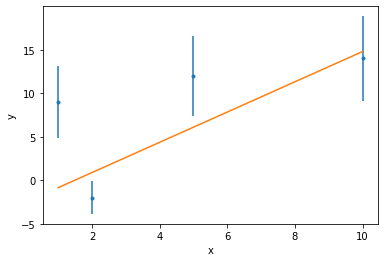

In [9]:
plot_fit()

In [10]:
get_fit_results()  # rich output

Parameter,Best-fit value,Approximate error
pl.c0,-2.58909,± 2.33419
pl.c1,1.73737,± 0.597081


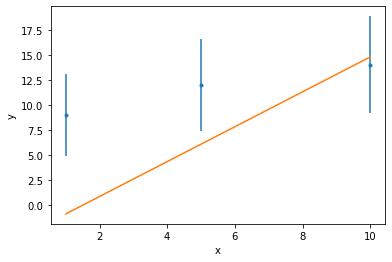

In [11]:
ignore(1.5, 2.5)
plot_fit()

In [12]:
fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 7.40466
Final fit statistic   = 0.0196631 at function evaluation 6
Data points           = 3
Degrees of freedom    = 1
Probability [Q-value] = 0.888482
Reduced statistic     = 0.0196631
Change in statistic   = 7.385
   pl.c0          8.68041      +/- 4.29407     
   pl.c1          0.558286     +/- 0.706193    


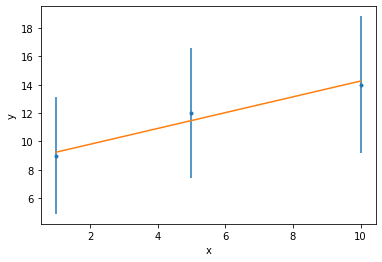

In [13]:
plot_fit()

In [14]:
conf()

pl.c0 lower bound:	-4.29407
pl.c0 upper bound:	4.29407
pl.c1 lower bound:	-0.706193
pl.c1 upper bound:	0.706193
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   pl.c0             8.68041     -4.29407      4.29407
   pl.c1            0.558286    -0.706193     0.706193


In [15]:
get_conf_results()  # rich output

Parameter,Best-fit value,Lower Bound,Upper Bound
pl.c0,8.68041,-4.29407,4.29407
pl.c1,0.558286,-0.706193,0.706193


# Can I run CIAO tools?

You can use `!<dmtool>` as with any unix command (at least from an ipython session). You can also run them using the standard Python modules, as described at https://cxc.harvard.edu/ciao/scripting/runtool.html#subprocess, but we suggest using the `ciao_contrib.runtool` module https://cxc.harvard.edu/ciao/scripting/runtool.html#runtool:

In [16]:
from ciao_contrib import runtool as rt  # this requires the ciao-contrib package

In [17]:
!ls data

acisf04938_000N002_r0043_arf3.fits  acisf04938_000N002_r0043_rmf3.fits
acisf04938_000N002_r0043_pha3.fits


You run CIAO tools with python functions:

In [18]:
rt.dmlist("data/acisf04938_000N002_r0043_pha3.fits", "blocks")

 
--------------------------------------------------------------------------------
Dataset: data/acisf04938_000N002_r0043_pha3.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM1                      Table         4 cols x 1024     rows
Block    3: GTI3                           Table         2 cols x 1        rows
Block    4: GTI2                           Table         2 cols x 5        rows
Block    5: SPECTRUM2                      Table         4 cols x 1024     rows
Block    6: GTI3_CPT2                      Table         2 cols x 5        rows

In [19]:
rt.dmlist("data/acisf04938_000N002_r0043_arf3.fits", "cols")

 
--------------------------------------------------------------------------------
Columns for Table Block SPECRESP
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   ENERG_LO             keV          Real4          -Inf:+Inf            Min Energy
   2   ENERG_HI             keV          Real4          -Inf:+Inf            Max Energy
   3   SPECRESP             cm**2        Real4          -Inf:+Inf            Effective Area
   4   PSF_FRAC                          Real8          -Inf:+Inf            Fraction of PSF enclosed in SRC region

Optional parameters are supported, and there is conversion from Python values to those supported by the tool:

In [20]:
rt.dmstat("data/acisf04938_000N002_r0043_arf3.fits[cols specresp]", median=True)

SPECRESP[cm**2]
    min:	0.02838011831 	      @:	1 
    max:	480.51446533 	      @:	125 
   mean:	173.55324853 
 median:	178.48394012 
  sigma:	131.67394595 
    sum:	156197.92368 
   good:	900 
   null:	0

The "function" contains information taken from the parameter file for the tool:

In [21]:
print(rt.dmstat)

Parameters for dmstat:

Required parameters:
              infile = data/acisf04938_000N002_r0043_arf3.fits[cols specresp]  Input file specification

Optional parameters:
            centroid = True             Calculate centroid if image?
              median = True             Calculate median value?
               sigma = True             Calculate the population standard deviation?
                clip = False            Calculate stats using sigma clipping?
              nsigma = 3.0              Number of sigma to clip
             maxiter = 20               Maximum number of iterations
             verbose = 1                Verbosity level
         out_columns = SPECRESP         Output Column Label
             out_min = 0.02838011831    Output Minimum Value
         out_min_loc = 1                Output Minimum Location Value
             out_max = 480.51446533     Output Maximum Value
         out_max_loc = 125              Output Maximum Location Value
            out_mean =

The parameters can even be read (or set for the next call):

In [22]:
rt.dmstat.out_median

'178.48394012'

Although the `runtool` module comes with functions for each tool, you can create a function for a specific tool (to avoid potential complications with parameter settings):

In [23]:
dms = rt.make_tool('dmstat')

In [24]:
print(dms)

Parameters for dmstat:

Required parameters:
              infile =                  Input file specification

Optional parameters:
            centroid = True             Calculate centroid if image?
              median = False            Calculate median value?
               sigma = True             Calculate the population standard deviation?
                clip = False            Calculate stats using sigma clipping?
              nsigma = 3                Number of sigma to clip
             maxiter = 20               Maximum number of iterations
             verbose = 1                Verbosity level
         out_columns =                  Output Column Label
             out_min =                  Output Minimum Value
         out_min_loc =                  Output Minimum Location Value
             out_max =                  Output Maximum Value
         out_max_loc =                  Output Maximum Location Value
            out_mean =                  Output Mean Value
   

In [25]:
dms.median = True
dms("data/acisf04938_000N002_r0043_arf3.fits[cols psf_frac]")

PSF_FRAC
    min:	0.91909490197 	      @:	651 
    max:	0.97671880734 	      @:	51 
   mean:	0.94588493995 
 median:	0.94405206988 
  sigma:	0.018654448891 
    sum:	851.29644595 
   good:	900 
   null:	0

In [26]:
print(dms)

Parameters for dmstat:

Required parameters:
              infile = data/acisf04938_000N002_r0043_arf3.fits[cols psf_frac]  Input file specification

Optional parameters:
            centroid = True             Calculate centroid if image?
              median = True             Calculate median value?
               sigma = True             Calculate the population standard deviation?
                clip = False            Calculate stats using sigma clipping?
              nsigma = 3.0              Number of sigma to clip
             maxiter = 20               Maximum number of iterations
             verbose = 1                Verbosity level
         out_columns = PSF_FRAC         Output Column Label
             out_min = 0.91909490197    Output Minimum Value
         out_min_loc = 651              Output Minimum Location Value
             out_max = 0.97671880734    Output Maximum Value
         out_max_loc = 51               Output Maximum Location Value
            out_mean =

In [27]:
print(rt.dmstat)

Parameters for dmstat:

Required parameters:
              infile = data/acisf04938_000N002_r0043_arf3.fits[cols specresp]  Input file specification

Optional parameters:
            centroid = True             Calculate centroid if image?
              median = True             Calculate median value?
               sigma = True             Calculate the population standard deviation?
                clip = False            Calculate stats using sigma clipping?
              nsigma = 3.0              Number of sigma to clip
             maxiter = 20               Maximum number of iterations
             verbose = 1                Verbosity level
         out_columns = SPECRESP         Output Column Label
             out_min = 0.02838011831    Output Minimum Value
         out_min_loc = 1                Output Minimum Location Value
             out_max = 480.51446533     Output Maximum Value
         out_max_loc = 125              Output Maximum Location Value
            out_mean =

# What happens if I want to use parts of Sherpa or add to it?

Firstly, welcome and think about following https://github.com/sherpa/sherpa and reading the documentation at https://sherpa.readthedocs.io/.

The `sherpa.astro.ui` module used above (and in the other notebooks in this repository) contains a (hidden) session class that [deals with a lot of data-management tasks](https://sherpa.readthedocs.io/en/latest/ui/index.html), such as

- creating and storing data
- creating and storing models
- automatically applying responses when needed (e.g. PSF or X-ray responses)
- handling a lot of the busy work when fitting data

However, this class leverages a number of other classes that you are free to use. You can even use them alongside the `sherpa.astro.ui` module (mainly the classes that [represent the data objects](https://sherpa.readthedocs.io/en/latest/data/index.html)) if needed.

The [tutorial on readthedocs](https://sherpa.readthedocs.io/en/latest/quick.html) gives an overview of how you can use these classes. This can be particularly helpful when you want to embed Sherpa into a larger program - e.g. fitting a number of datasets - but don't need the management-layer provided by `sherpa.astro.ui`.

If you are interested in re-using parts of Sherpa then you can import just those parts - such as the [statistics](https://sherpa.readthedocs.io/en/latest/statistics/index.html) or [optimisers](https://sherpa.readthedocs.io/en/latest/optimisers/index.html). In general we prefer people to use the class interface - as it's the most stable - but you can use some very low-level pieces if you desire (e.g. the neldermead minimiser without any of the support provided by the data-class structure for filtering data). At this point it's probably easiest to contact me or any of the other Sherpa developers directly.